# Module 5 - Bivariate analysis: qualitative vs quantitative

In this module, we discuss the case where the independent variable is qualitative and the dependent is quantitative. Some typical examples of research question in this case:

- Within a certain species of animals, are male individuals significantly larger than females?
- Does a new vaccine protect against the disease like it's supposed to?
- Does a certain study method like "retrieval practice" actually improve learning outcomes (i.e. student's grades)?

In this course, we only treat the case where we compare two groups. There are methods to compare more than two groups (e.g. the ANOVA test), but those are beyond the scope of this course.

In [11]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz

## Data visualisation

The following chart types may be appropriate for this type of data:

- grouped boxplot or violin plot
- grouped density (kde-)plot
- bar chart with error bars

We'll use the dataset `tips`, included in the Seaborn package to illustrate these.

### Boxplot or violin plot

For a horizontal boxplot, map the independent (qualitative) variable on the Y-axis and the dependent (quantitative) variable on the X-axis. Swap for a vertical plot.

<AxesSubplot:xlabel='tip', ylabel='sex'>

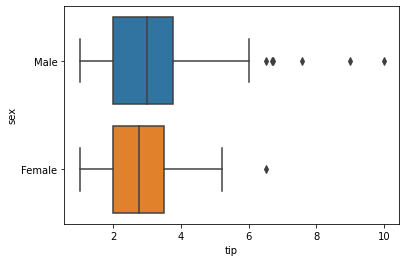

In [12]:
tips = sns.load_dataset("tips")
sns.boxplot(data=tips, x='tip', y='sex')

If there's a lot of overlap between the different groups, this indicates that there is no relation between both variables.

The violin plot works similarly:

<AxesSubplot:xlabel='tip', ylabel='sex'>

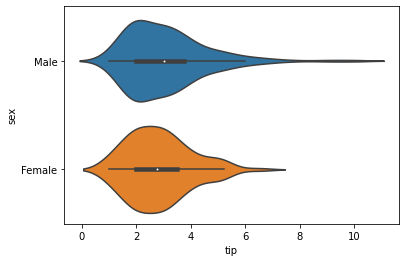

In [13]:
sns.violinplot(data=tips, x='tip', y='sex')

### Density plot

For a density (kernel density estimate) plot, map the independent (qualitative) variable on the `hue` attribute and the dependent variable on the X-axis.

<AxesSubplot:xlabel='tip', ylabel='Density'>

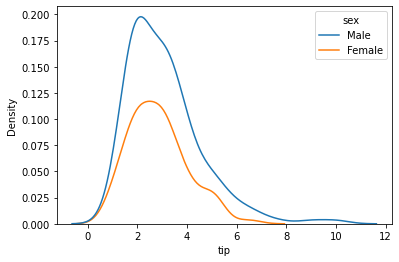

In [14]:
sns.kdeplot(data=tips, hue='sex', x='tip')

### Bar chart with error bars

Another chart type that is often used for this type of data is a bar plot of the sample mean of each group. However, watch out with this. Only showing the sample mean in a chart is insufficient to determine whether any difference between groups is significant. A chart should also show the dispersion in the data set. This can be visualized using error bars.

In the example below, the parameter `ci='sd'` will show the standard deviation:

<AxesSubplot:xlabel='sex', ylabel='tip'>

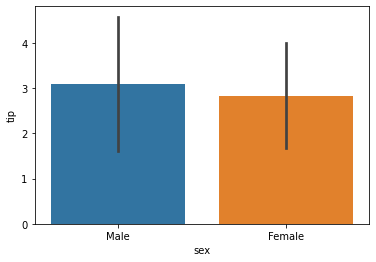

In [15]:
sns.barplot(data=tips, x='sex', y='tip', ci='sd')

Again, if there's a lot of overlap between the error bars, this indicates that there is no (or only a small) association between the variables.

Remark that this type of chart is only useful if the variable is normally distributed. In this dataset with a lot of outliers (see the boxplot from earlier), the symmetrical error bars do not correctly represent how the data is distributed. Usually a boxplot or density plot is more appropriate.

## The t-test for two independent samples

Earlier, we saw how to apply the $t$-test to verify a statement about the sample mean of a small sample. The $t$-test can also be used to compare two samples. First, we will look at the case of independent samples that were taken separately.

**Example:** In a clinical trial, researchers want to determine whether some new drug has a reduced reaction speed as a side effect. Six participants received the drug (treatment group), while six others received a placebo (control group). Their response time to a stimulus was then measured (in ms). We want to investigate whether there are significant differences between the treatment and control groups.

The response time measurements are given below:

In [16]:
control = np.array([91, 87, 99, 77, 88, 91])
treatment = np.array([101, 110, 103, 93, 99, 104])

The population mean for patients in the control group is notated $\mu_1$, for those in the treatment group $\mu_2$.

The hypotheses are:

- $H_0$: $\mu_1 - \mu_2 = 0$ (reaction speed is the same in both groups)
- $H_1$: $\mu_1 - \mu_2 < 0$ (reaction speed is significantly higher in the treatment group compared to the control group)

In Python, we can use the `ttest_ind()` function from `scipy.stats`. Parameters `a` and `b` are the two groups to be compared. `alternative='less'` indicates that we want to test for the alternative hypothesis that the mean of the control group is less than the mean of the treatment group. Finally, by setting `equal_var=False`, it is *not* assumed that both groups have the same standard deviation.

In [17]:
stats.ttest_ind(a=control, b=treatment,
    alternative='less', equal_var=False)

Ttest_indResult(statistic=-3.445612673536487, pvalue=0.003391230079206901)

The $p$-value is very small, which means that, if the null hypothesis would be correct, it is highly unlikely to observe the differences between the two groups. Consequently, we reject the null hypothesis. Based on the sample, there is reason to conclude that the drug does indeed have a significant impact on reaction speed.

**Example:** In the `tips` dataset, do male and female staff get the same tips or is there a difference?


In [18]:
stats.ttest_ind(alternative='two-sided',
    a=tips.tip[tips.sex == 'Male'],
    b=tips.tip[tips.sex == 'Female'])

Ttest_indResult(statistic=1.3878597054212687, pvalue=0.16645623503456763)

The $p$ value of 0.166 is quite large, so we do not reject the null hypothesis. On a significance level of e.g. 0.05, the data set does not contain evidence that male and female serving staff receive different tips.


## The t-test for paired samples

In this variant of the $t$-test, a measurement is taken on each element of the sample, one time before and one time after an intervention. The aim is to determine whether the intervention had a significant effect on the measurement.

**Case:** A study examined whether cars that run on petrol with additives also have a lower consumption. Ten cars were first filled with either regular gasoline or gasoline with additives (determined by tossing a coin), after which consumption was measured (expressed in miles per gallon). The cars were then refueled with the other type of petrol and consumption was measured again.

We use a paired $t$ test to determine whether cars are significantly more economical on gasoline with additives.

In [19]:
# Measurements:
regular =   np.array([16, 20, 21, 22, 23, 22, 27, 25, 27, 28])
additives = np.array([19, 22, 24, 24, 25, 25, 26, 26, 28, 32])

# Paired t-test with ttest_rel()
stats.ttest_rel(regular, additives, alternative='less')

Ttest_relResult(statistic=-4.47213595499958, pvalue=0.00077494295585091)

We use `alternative='less'` because we want to check whether the mileage per gallon on regular fuel is smaller than on fuel with additives.

The $p$-value, 0.0007749, is very small. Even with an $\alpha = 0.01$, we can reject the null hypothesis. According to this sample, we have reasons to assume that the fuel with additives indeed leads to significantly lower fuel consumption.



## Effect size


If we want to know whether two groups are significantly different, we can use a statistical test like the two sample $t$-test. The result of a statistical test is generally either "true" or "false", depending on the $p$-value and the chosen significance level.

*Effect size* is another metric to express the magnitude of the difference between two groups. Several definitions of effect size exist, but one of the most commonly used is *Cohen's $d$*.

*Cohen's $d$* is in particular used in research in education to evaluate what factors influence learning outcomes for students. Factors include learning and teaching strategies, use of technology, classroom management, student and teacher attributes, etc.


$$d = \frac{\overline{x}_1 - \overline{x}_2}{s}$$

$$s = \sqrt{\frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}}$$

With: $\overline{x}_1$ and $\overline{x}_2$ the mean of each group, $n_1$ and $n_2$ the respective sample sizes and $s_1$ and $s_2$ the respective sample standard deviations.

Research papers in this domain always report Cohen's $d$, which allows us to compare the results of different studies. For example, Hattie (2012) performed a massive meta-analysis that synthesises findings from 80,000 studies into what works best in education. As a rule of thumb, an influence with $d$ of at least 0.4 is considered to potentially accelerate student achievement. A value for $d$ of 1 means that students can acquire competencies in about half the time they normally would.

### Cohen's $d$

Cohen's $d$ is defined as the difference between the means of both groups, divided by a pooled standard deviation. There's no Python function for calculating Cohen's $d$ readily available, so we define it here, according to the formula:


In [20]:
def cohen_d(a, b):
    na = len(a)
    nb = len(b)
    pooled_sd = np.sqrt( ((na-1) * a.std()**2 +
                          (nb-1) * b.std()**2) / (na + nb - 2) )
    return (b.mean() - a.mean()) / pooled_sd

In [21]:
# Effect size of additives in gasoline:
cohen_d(regular, additives)

0.5874734954460467